## Class Notes

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-05-30 18:03:41.127659: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 18:03:41.438637: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 18:03:41.444017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 18:03:43.332530: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.5)
session = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

2023-05-30 18:03:46.798069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-30 18:03:47.035852: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [5]:
circles = pd.DataFrame({
    'x0': X[:,0], 'x1': X[:,1], 'label':y
})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


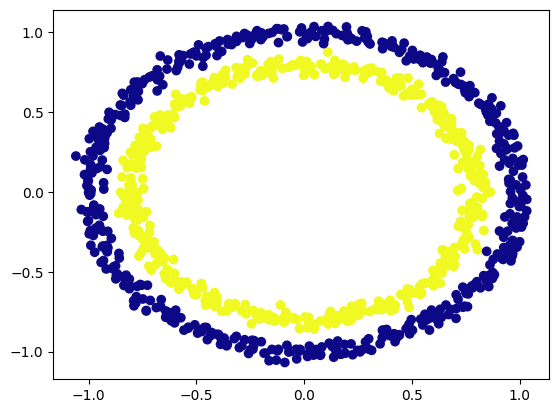

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20)

2023-05-30 18:03:47.769838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-30 18:03:47.770012: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.4863
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5537
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.5950
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6112
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7625
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.8425
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.9375
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.9650
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9850
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9937
Epoch 11/20
25/25 [

In [10]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 1.0000


[0.01837061531841755, 1.0]

Text(0.5, 0, 'epoch')

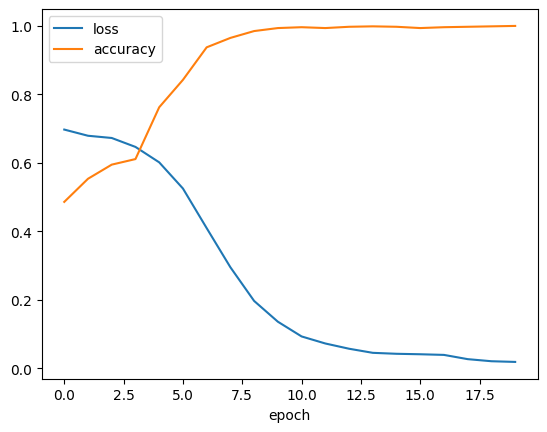

In [11]:
pd.DataFrame(history.history).plot()
plt.style.use('seaborn-v0_8')
plt.xlabel('epoch')

In [12]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


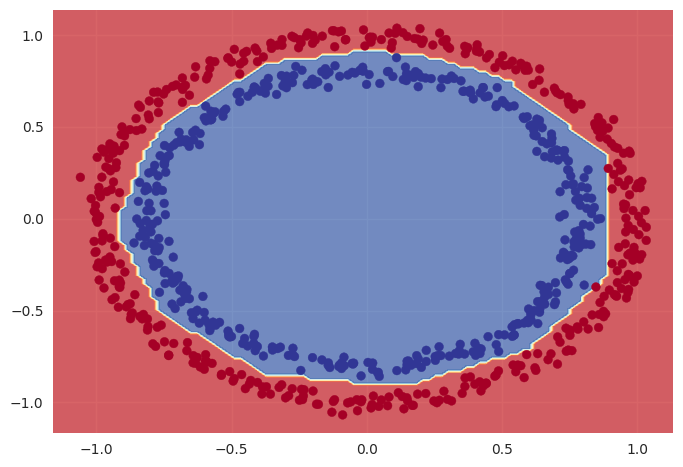

In [13]:
plot_decision_boundary(model, X_train, y_train)

In [14]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 1.0000


[0.01837061531841755, 1.0]

In [15]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6848 - accuracy: 0.5263
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5700
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5537
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5650
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5675
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.5875
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5900
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.5962
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.6388
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6737
Epoch 11/25
25/25 [

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


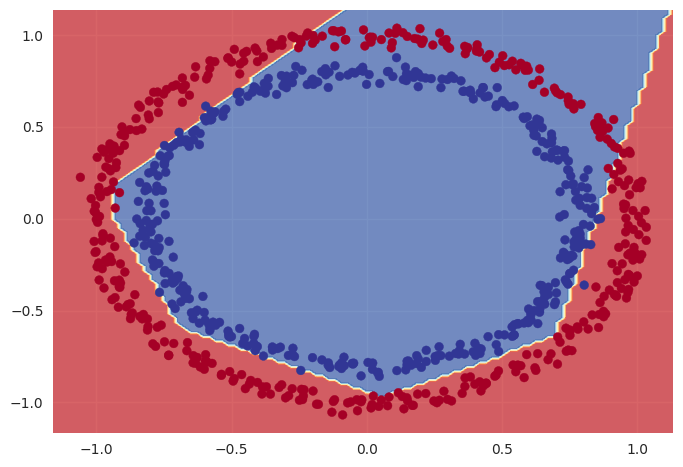

In [16]:
plot_decision_boundary(model_2, X_train, y_train)

<Axes: >

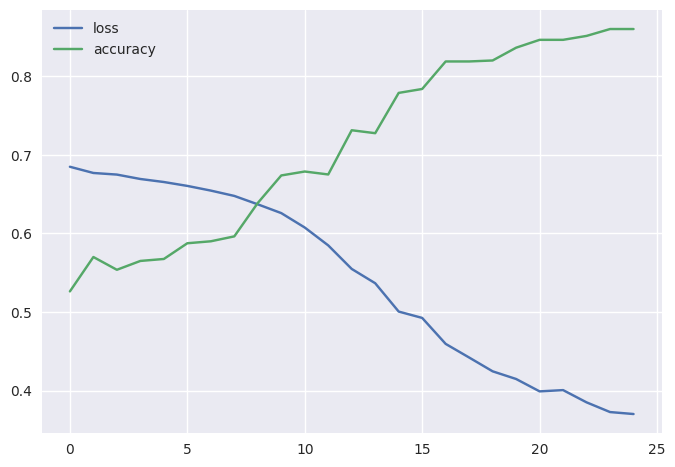

In [17]:
pd.DataFrame(history_2.history).plot()

In [18]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 1ms/step


array([[ 96,   0],
       [  0, 104]])

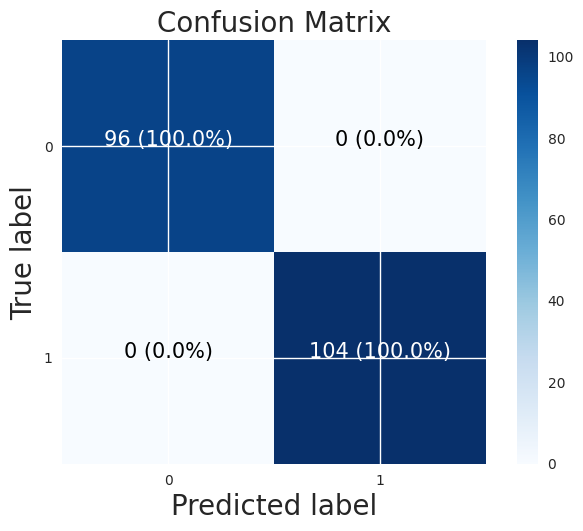

In [19]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots()
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

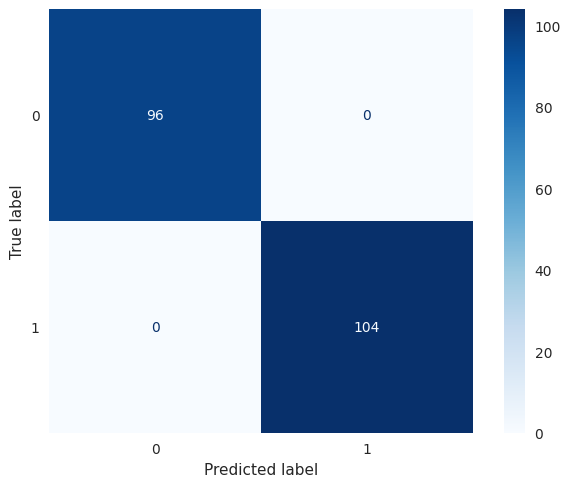

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_plot = ConfusionMatrixDisplay(cm)

cm_plot.plot(cmap='Blues')
plt.grid(False)

### Multi-class Classification

In [21]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [22]:
print(f'Training sample:\n{train_data[0]}')
print(f'Training label:\n{train_labels[0]}')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [23]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Text(0.5, 1.0, '2')

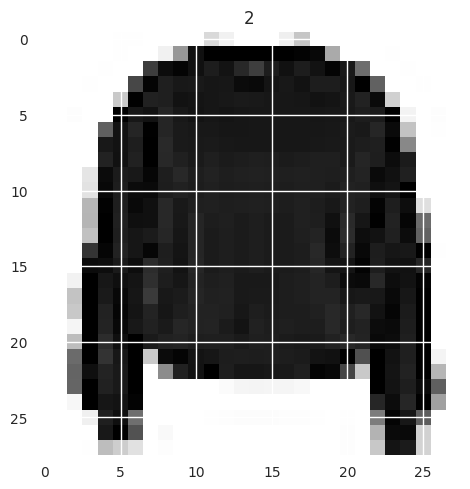

In [24]:
plt.imshow(train_data[7])
plt.title(train_labels[7])

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Text(0.5, 1.0, 'Dress')

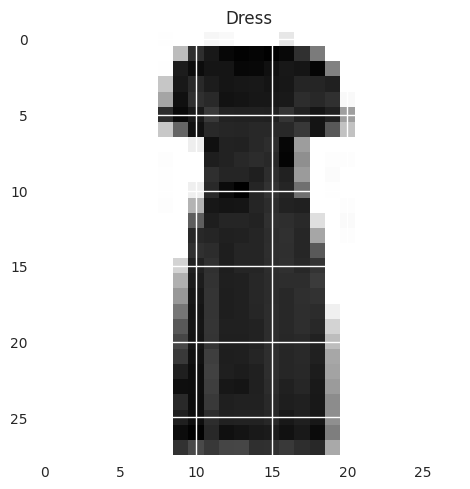

In [26]:
plt.imshow(train_data[50], cmap='binary')
plt.title(class_names[train_labels[50]])

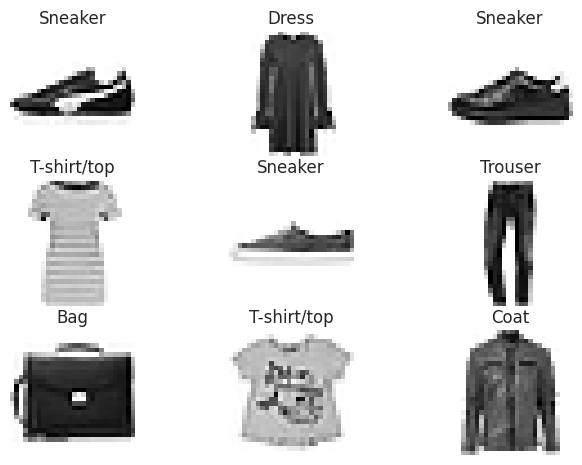

In [27]:
import random 

for i in range(9):
    ax = plt.subplot(3,3,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap='binary')
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [28]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4912 - accuracy: 0.1261 - val_loss: 2.2199 - val_accuracy: 0.1352
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1504 - accuracy: 0.1689 - val_loss: 1.9968 - val_accuracy: 0.2297
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7337 - accuracy: 0.3064 - val_loss: 1.5947 - val_accuracy: 0.3380
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5494 - accuracy: 0.3461 - val_loss: 1.5255 - val_accuracy: 0.3502
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4367 - accuracy: 0.4088 - val_loss: 1.3719 - val_accuracy: 0.4273
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3087 - accuracy: 0.4482 - val_loss: 1.2521 - val_accuracy: 0.4646
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2447 - accuracy: 0.4599 - val_loss: 1.2374 - val_accuracy:

In [29]:
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [30]:
train_data.min(), train_data.max()

(0, 255)

In [31]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [32]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10


2023-05-30 18:04:46.898547: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 1.0125 - accuracy: 0.6313 - val_loss: 0.7021 - val_accuracy: 0.7491
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6468 - accuracy: 0.7707 - val_loss: 0.6378 - val_accuracy: 0.7708
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6045 - accuracy: 0.7818 - val_loss: 0.6360 - val_accuracy: 0.7686
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5833 - accuracy: 0.7862 - val_loss: 0.6067 - val_accuracy: 0.7764
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5701 - accuracy: 0.7896 - val_loss: 0.6217 - val_accuracy: 0.7729
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5617 - accuracy: 0.7914 - val_loss: 0.6011 - val_accuracy: 0.7779
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5541 - accuracy: 0.7939 - val_loss: 0.5984 - val_accuracy: 0.7727
Epo

<Axes: title={'center': 'Norm Data'}>

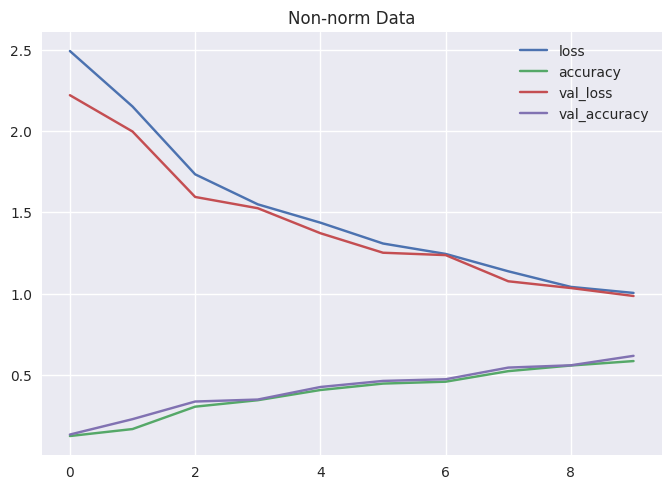

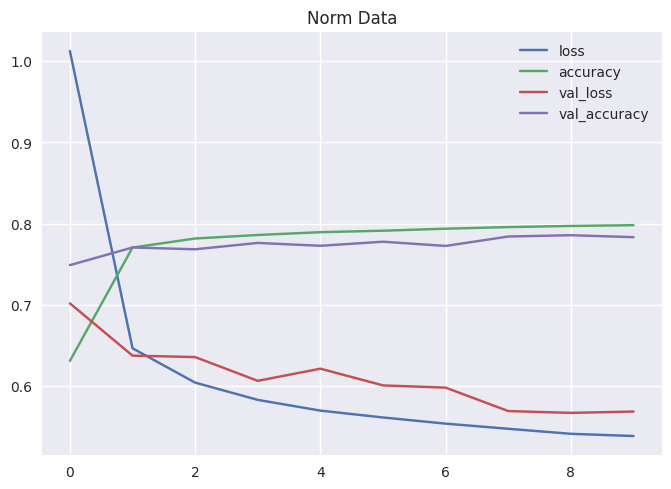

In [33]:
pd.DataFrame(non_norm_history.history).plot(title='Non-norm Data')
pd.DataFrame(norm_history.history).plot(title='Norm Data')

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3070 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [72]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7987 - accuracy: 0.2388 - val_loss: 1.6552 - val_accuracy: 0.2723
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6129 - accuracy: 0.3038 - val_loss: 1.5715 - val_accuracy: 0.3349
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5548 - accuracy: 0.3332 - val_loss: 1.5275 - val_accuracy: 0.3521
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5196 - accuracy: 0.3466 - val_loss: 1.5021 - val_accuracy: 0.3621
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4366 - accuracy: 0.3925 - val_loss: 1.3567 - val_accuracy: 0.4313
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3237 - accuracy: 0.4370 - val_loss: 1.2724 - val_accuracy: 0.4550
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2646 - accuracy: 0.4531 - val_loss: 1.2701 - val_accuracy:

In [63]:
def make_confusion_matrix(y_true, y_pred):
    
    cm = confusion_matrix(y_true, y_pred)
    cm_plot = ConfusionMatrixDisplay(cm)

    cm_plot.plot(cmap='Blues')
    plt.grid(False)

In [76]:
y_probs = model_14.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [80]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle Boot')

In [81]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction label
y_preds[:10]

array([9, 8, 1, 1, 6, 1, 6, 6, 5, 7])

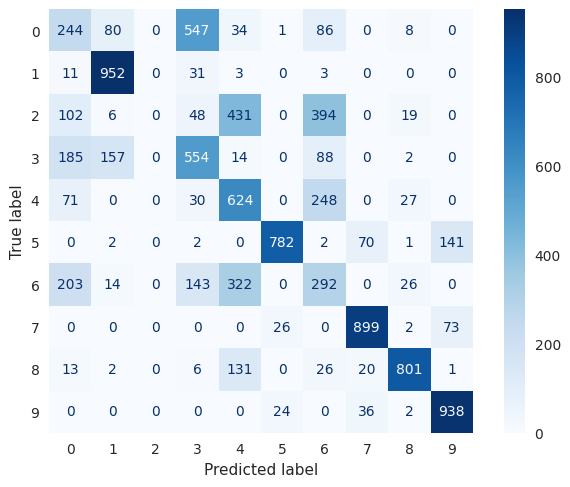

In [82]:
make_confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)